### Importing libs and reading csv file

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv("house_price_predict.csv")


### Cleaning and preparing data

Here we fill `nan` cells, extract target column and features and split dataset into train and test sets.

I tried different methods of dilling `nan` cells here and my experiments show that best score is produced with `ffill` method of filling ie we will use last valid value instead of `nan` until we meet next valid value.

We do not need `Price` column in the features set since it is our target column, and we do not need `Unnamed:0` column cause it seems like some indices which are not needed.

In [8]:
data = data.fillna(method='ffill')
#data = data.fillna(method='backfill')
#data = data.fillna(0)
#data = data.fillna(data.mean())
#data = data.fillna(data.median())

X = data.drop(['Unnamed: 0', 'Price'], axis = 1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Instantiating and training regression

In [9]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting results for test set we produced earlier


In [10]:
Y = regr.predict(X_test)

### Checking score and checking for errors

In [11]:
print("Mean squared error: %.2f" % np.mean((Y - y_test) ** 2))
print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean squared error: 22.64
Variance score: 0.75


### Drawing plot

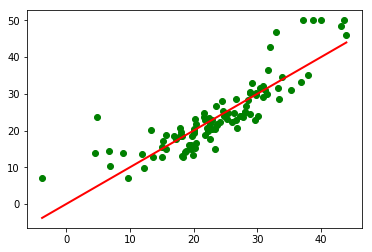

In [12]:
plt.scatter(Y, y_test, color='g')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r-', linewidth=2)
plt.show()